In [38]:
# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
# 读取数据
df = pd.read_csv('Census Income Data Set/adult.data.csv', header=None,
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                        'marital-status', 'occupation', 'relationship', 'race',
                        'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                        'native-country', 'income'])

# 显示数据基本信息
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None
   age          workclass  fnlwgt   education  education-num  \
0   39          State-go

In [40]:
# 检查缺失值
print(df.isnull().sum())
for column in df.columns:
    if df[column].dtype == 'object':  # 只检查分类变量
        question_marks = (df[column] == ' ?').sum()
        if question_marks > 0:
            print(f"{column}: {question_marks} 个'?'值")
            print(f"占比: {(question_marks/len(df))*100:.2f}%")

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
workclass: 1836 个'?'值
占比: 5.64%
occupation: 1843 个'?'值
占比: 5.66%
native-country: 583 个'?'值
占比: 1.79%


In [41]:
# 处理缺失值 - 使用删除法
# 创建数据副本
df_cleaned = df.copy()

# 删除包含'?'的行
columns_with_missing = ['workclass', 'occupation', 'native-country']
rows_before = len(df_cleaned)

for column in columns_with_missing:
    df_cleaned = df_cleaned[df_cleaned[column] != ' ?']

# 显示处理结果
rows_after = len(df_cleaned)
rows_removed = rows_before - rows_after

print(f"之前的行数: {rows_before}")
print(f"之后的行数: {rows_after}")
print(f"删除的行数: {rows_removed}")
print(f"删除比例: {(rows_removed/rows_before)*100:.2f}%")

# 更新原始数据集
df = df_cleaned.copy()
print(f"数据集维度: {df.shape}")

之前的行数: 32561
之后的行数: 30162
删除的行数: 2399
删除比例: 7.37%
数据集维度: (30162, 15)


c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


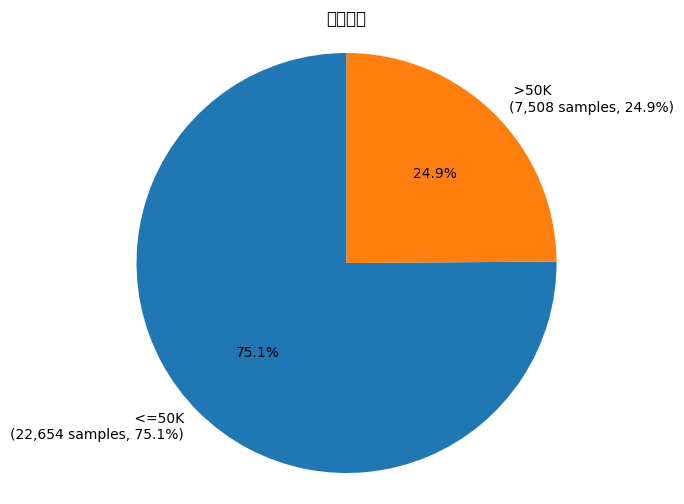

 <=50K: 22,654 样本 (75.1%)
 >50K: 7,508 样本 (24.9%)


In [42]:
#  EDA

# 1. 分析目标变量的分布
income_dist = df['income'].value_counts()
income_dist_pct = df['income'].value_counts(normalize=True)

# 创建一个饼图来可视化收入分布
plt.figure(figsize=(8, 6))
plt.pie(income_dist, labels=[f"{label}\n({count:,} samples, {percentage:.1%})" 
                            for label, count, percentage 
                            in zip(income_dist.index, income_dist, income_dist_pct)],
        autopct='%1.1f%%', startangle=90)
plt.title('收入分布')
plt.axis('equal')
plt.show()

for income_level, count in income_dist.items():
    print(f"{income_level}: {count:,} 样本 ({income_dist_pct[income_level]:.1%})")

分类特征的类别数量：

workclass: 7 个类别

前5个类别的分布：
 Private: 22,286 (73.9%)
 Self-emp-not-inc: 2,499 (8.3%)
 Local-gov: 2,067 (6.9%)
 State-gov: 1,279 (4.2%)
 Self-emp-inc: 1,074 (3.6%)

education: 16 个类别

前5个类别的分布：
 HS-grad: 9,840 (32.6%)
 Some-college: 6,678 (22.1%)
 Bachelors: 5,044 (16.7%)
 Masters: 1,627 (5.4%)
 Assoc-voc: 1,307 (4.3%)

marital-status: 7 个类别

前5个类别的分布：
 Married-civ-spouse: 14,065 (46.6%)
 Never-married: 9,726 (32.2%)
 Divorced: 4,214 (14.0%)
 Separated: 939 (3.1%)
 Widowed: 827 (2.7%)

occupation: 14 个类别

前5个类别的分布：
 Prof-specialty: 4,038 (13.4%)
 Craft-repair: 4,030 (13.4%)
 Exec-managerial: 3,992 (13.2%)
 Adm-clerical: 3,721 (12.3%)
 Sales: 3,584 (11.9%)

relationship: 6 个类别

前5个类别的分布：
 Husband: 12,463 (41.3%)
 Not-in-family: 7,726 (25.6%)
 Own-child: 4,466 (14.8%)
 Unmarried: 3,212 (10.6%)
 Wife: 1,406 (4.7%)

race: 5 个类别

前5个类别的分布：
 White: 25,933 (86.0%)
 Black: 2,817 (9.3%)
 Asian-Pac-Islander: 895 (3.0%)
 Amer-Indian-Eskimo: 286 (0.9%)
 Other: 231 (0.8%)

sex: 2 个类别

前5

C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\830149179.py:23: UserWarni

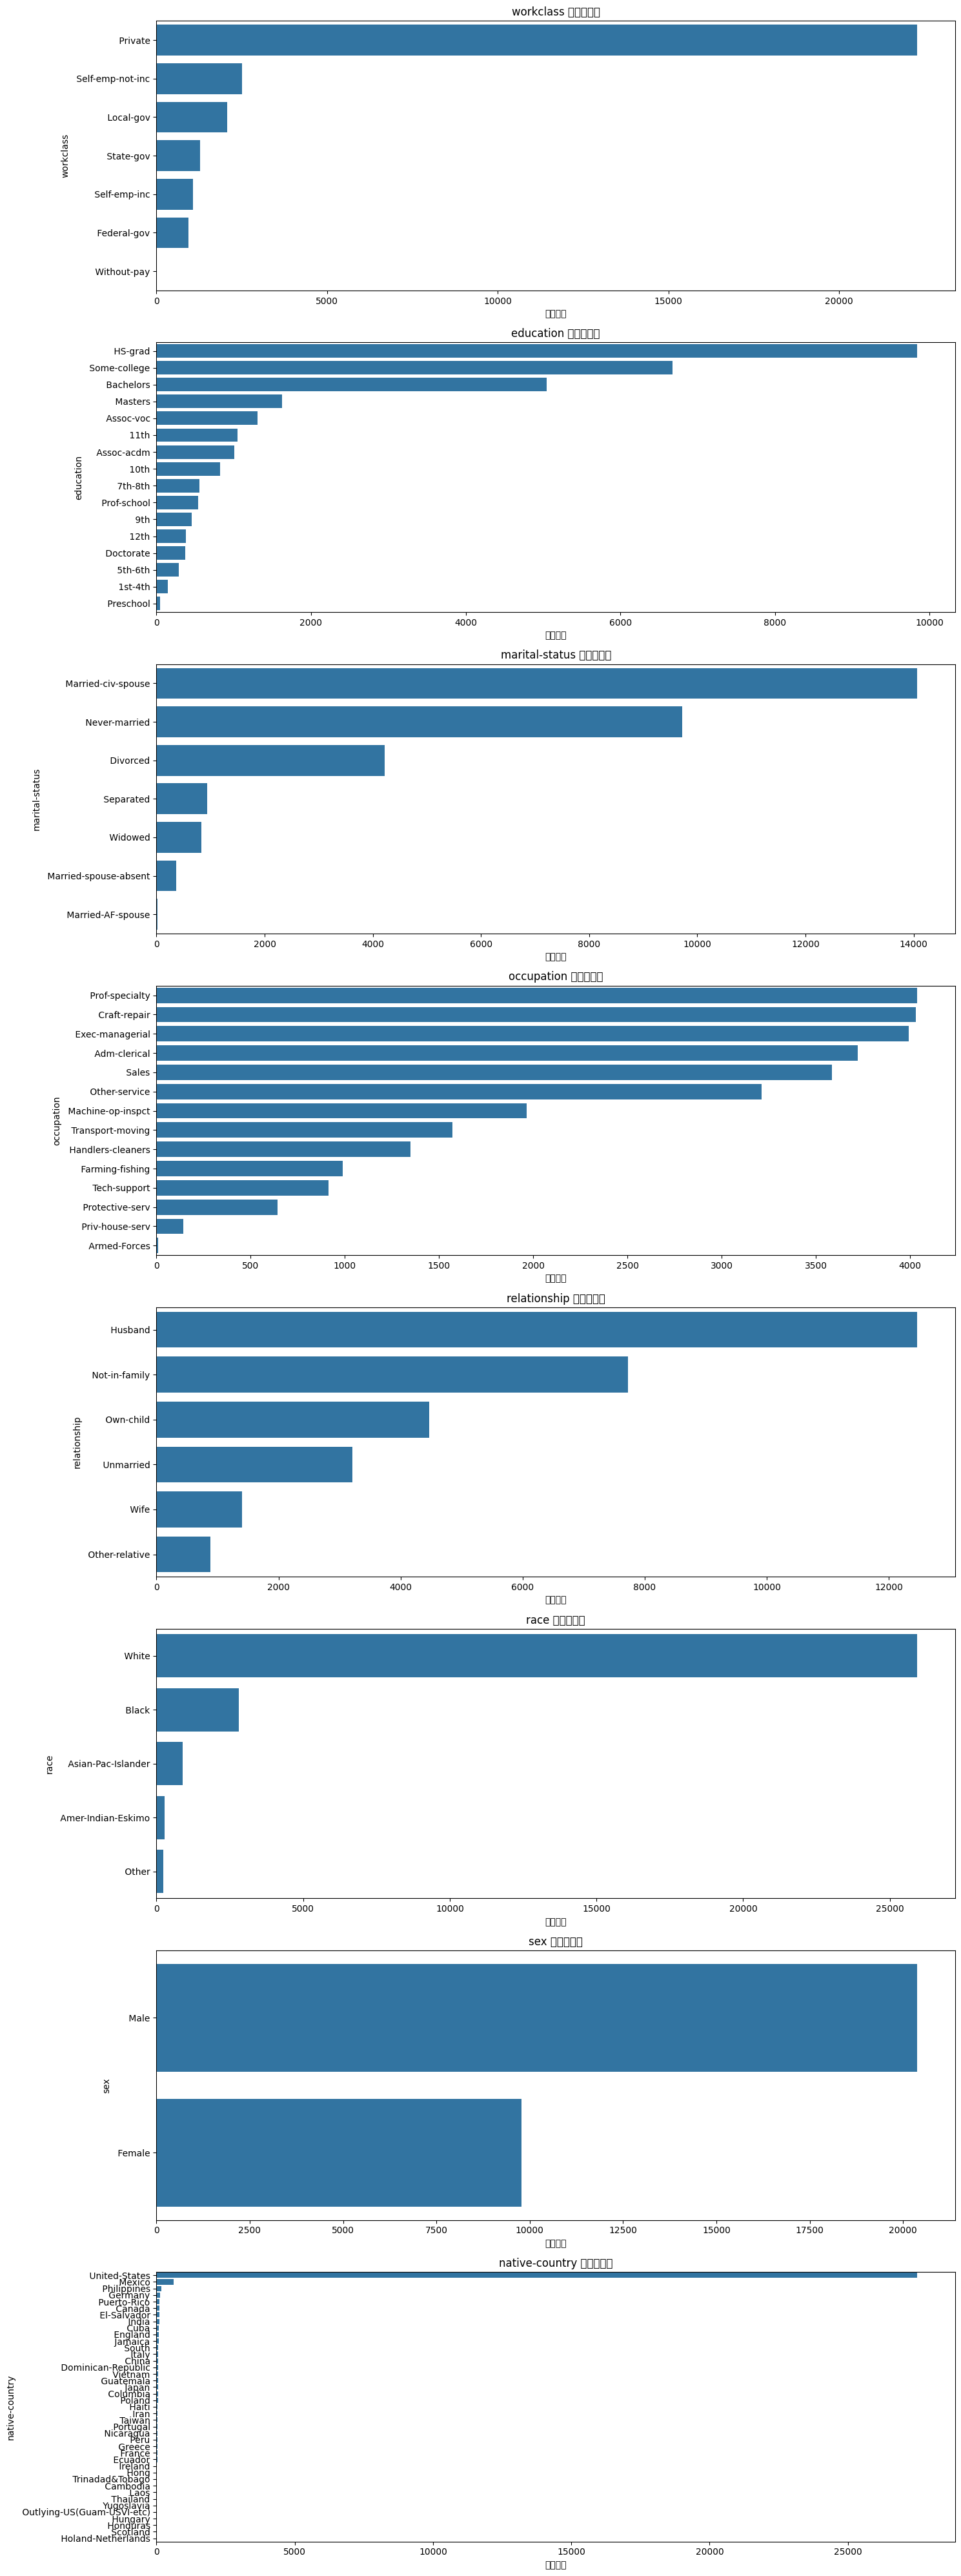

In [43]:
# 2. 分析分类特征的类别数量和分布
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

print("分类特征的类别数量：")
for feature in categorical_features:
    n_unique = df[feature].nunique()
    print(f"\n{feature}: {n_unique} 个类别")
    print("\n前5个类别的分布：")
    feature_dist = df[feature].value_counts()
    for category, count in feature_dist.head().items():
        percentage = count / len(df) * 100
        print(f"{category}: {count:,} ({percentage:.1f}%)")

# 使用条形图可视化每个特征的类别分布
plt.figure(figsize=(15, 40))
for i, feature in enumerate(categorical_features):
    plt.subplot(8, 1, i+1)
    feature_counts = df[feature].value_counts()
    sns.barplot(x=feature_counts.values, y=feature_counts.index)
    plt.title(f'{feature} 的类别分布')
    plt.xlabel('样本数量')
plt.tight_layout()
plt.show()

C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\902368091.py:15: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\902368091.py:15: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\902368091.py:15: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\902368091.py:15: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\902368091.py:15: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2

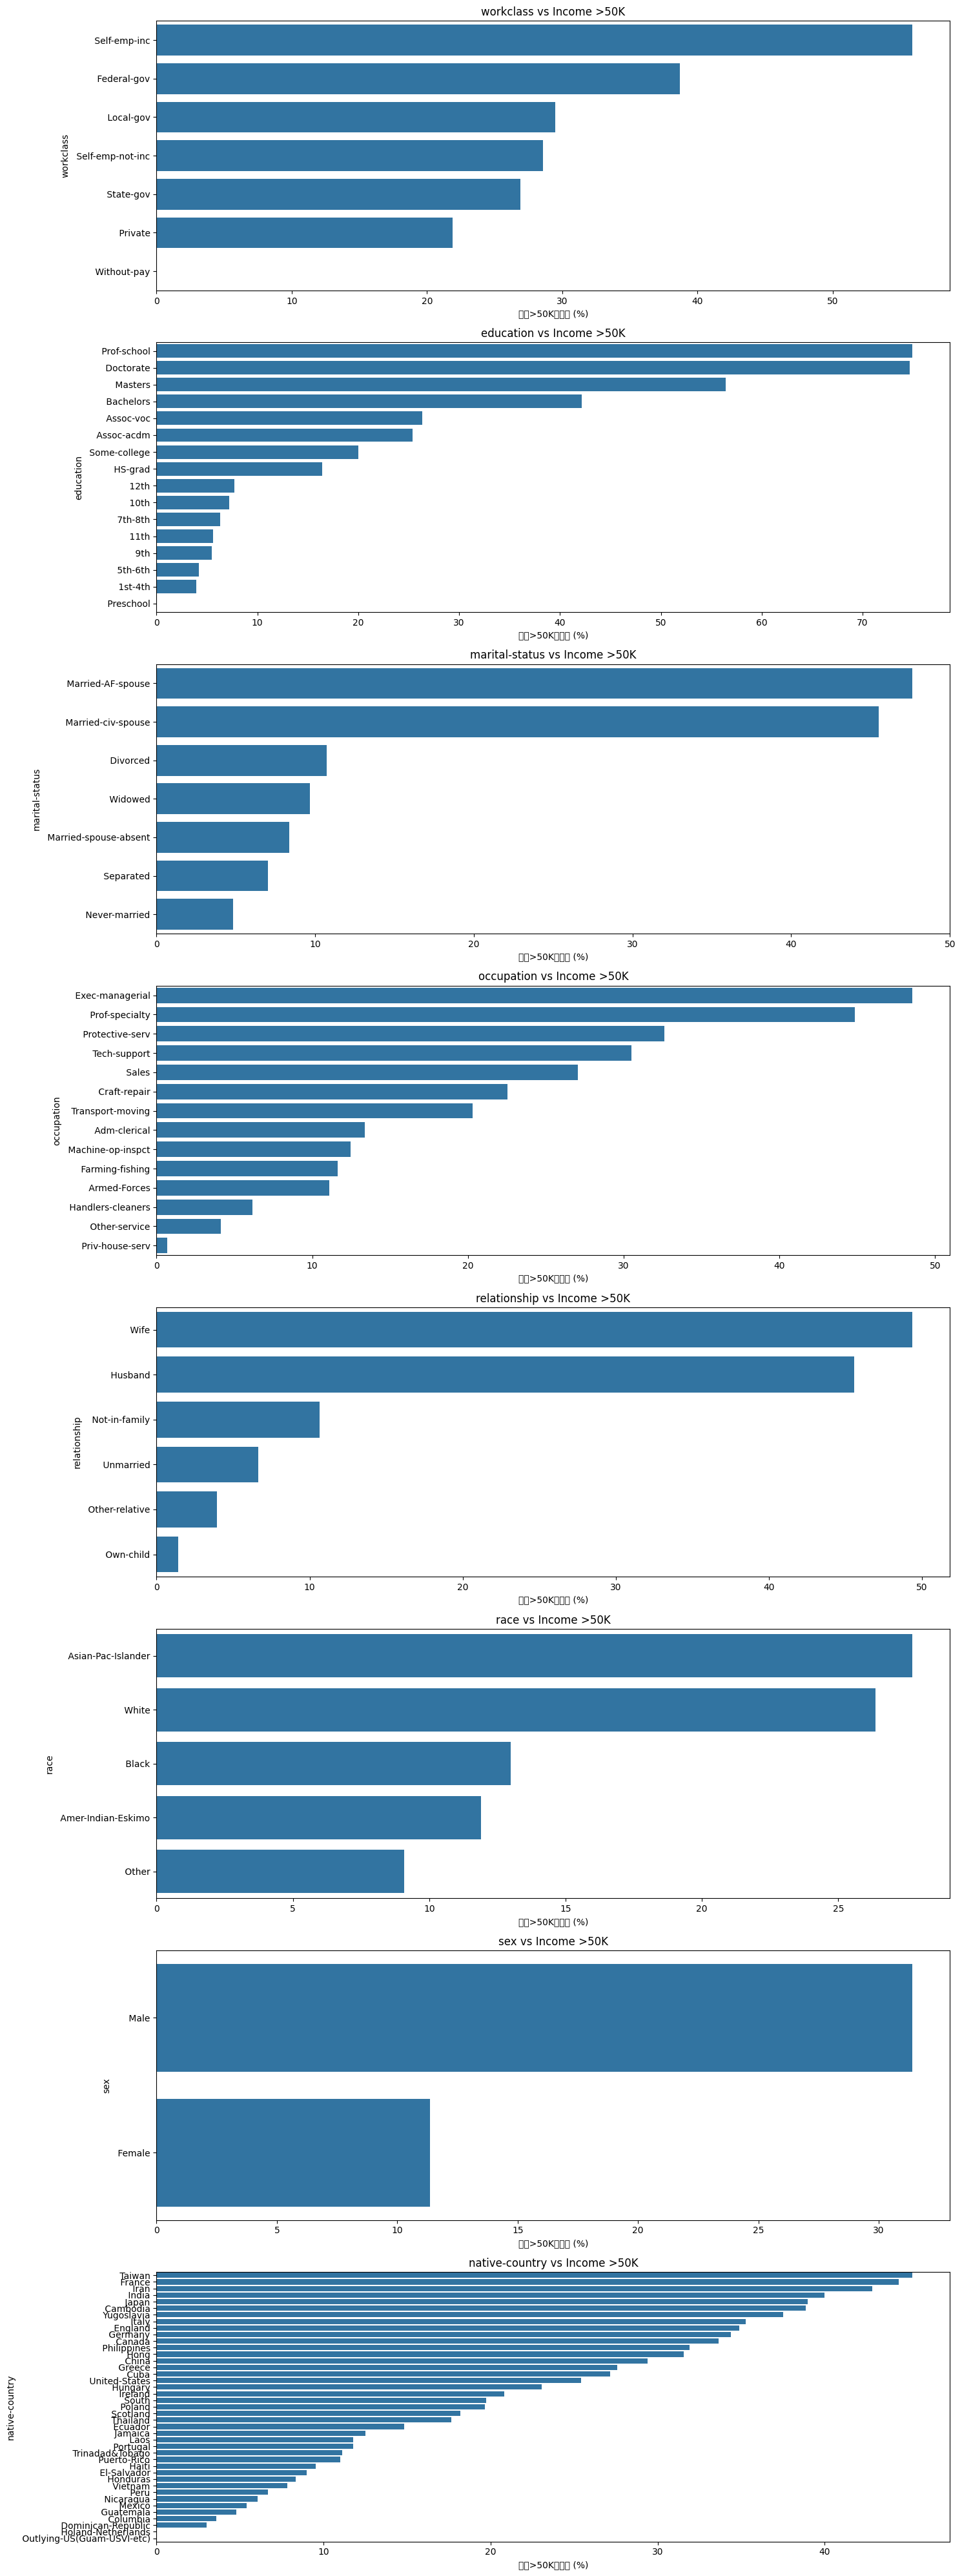


各特征与高收入的关系分析：

workclass:
                   <=50K (%)   >50K (%)
workclass                              
Self-emp-inc       44.134078  55.865922
Federal-gov        61.293743  38.706257
Local-gov          70.537010  29.462990
Self-emp-not-inc   71.428571  28.571429
State-gov          73.103987  26.896013
Private            78.120793  21.879207
Without-pay       100.000000   0.000000

education:
               <=50K (%)   >50K (%)
education                          
Prof-school    25.092251  74.907749
Doctorate      25.333333  74.666667
Masters        43.577136  56.422864
Bachelors      57.850912  42.149088
Assoc-voc      73.680184  26.319816
Assoc-acdm     74.603175  25.396825
Some-college   79.994010  20.005990
HS-grad        83.567073  16.432927
12th           92.307692   7.692308
10th           92.804878   7.195122
7th-8th        93.716338   6.283662
11th           94.370229   5.629771
9th            94.505495   5.494505
5th-6th        95.833333   4.166667
1st-4th        96.026490 

In [44]:
# 3. 分析分类特征与目标变量的关系
plt.figure(figsize=(15, 40))
for i, feature in enumerate(categorical_features):
    plt.subplot(8, 1, i+1)
    
    # 计算每个类别中收入>50K的比例
    proportions = df.groupby(feature)['income'].apply(
        lambda x: (x == ' >50K').mean() * 100
    ).sort_values(ascending=False)
    
    # 绘制条形图
    sns.barplot(x=proportions.values, y=proportions.index)
    plt.title(f'{feature} vs Income >50K')
    plt.xlabel('收入>50K的比例 (%)')
plt.tight_layout()
plt.show()

# 打印详细的统计信息
print("\n各特征与高收入的关系分析：")
for feature in categorical_features:
    print(f"\n{feature}:")
    cross_tab = pd.crosstab(df[feature], df['income'], normalize='index') * 100
    cross_tab.columns = ['<=50K (%)', '>50K (%)']
    print(cross_tab.sort_values('>50K (%)', ascending=False))

C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\2967672581.py:10: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\2967672581.py:10: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python\lib\site-packages\IPython\core\pylabto

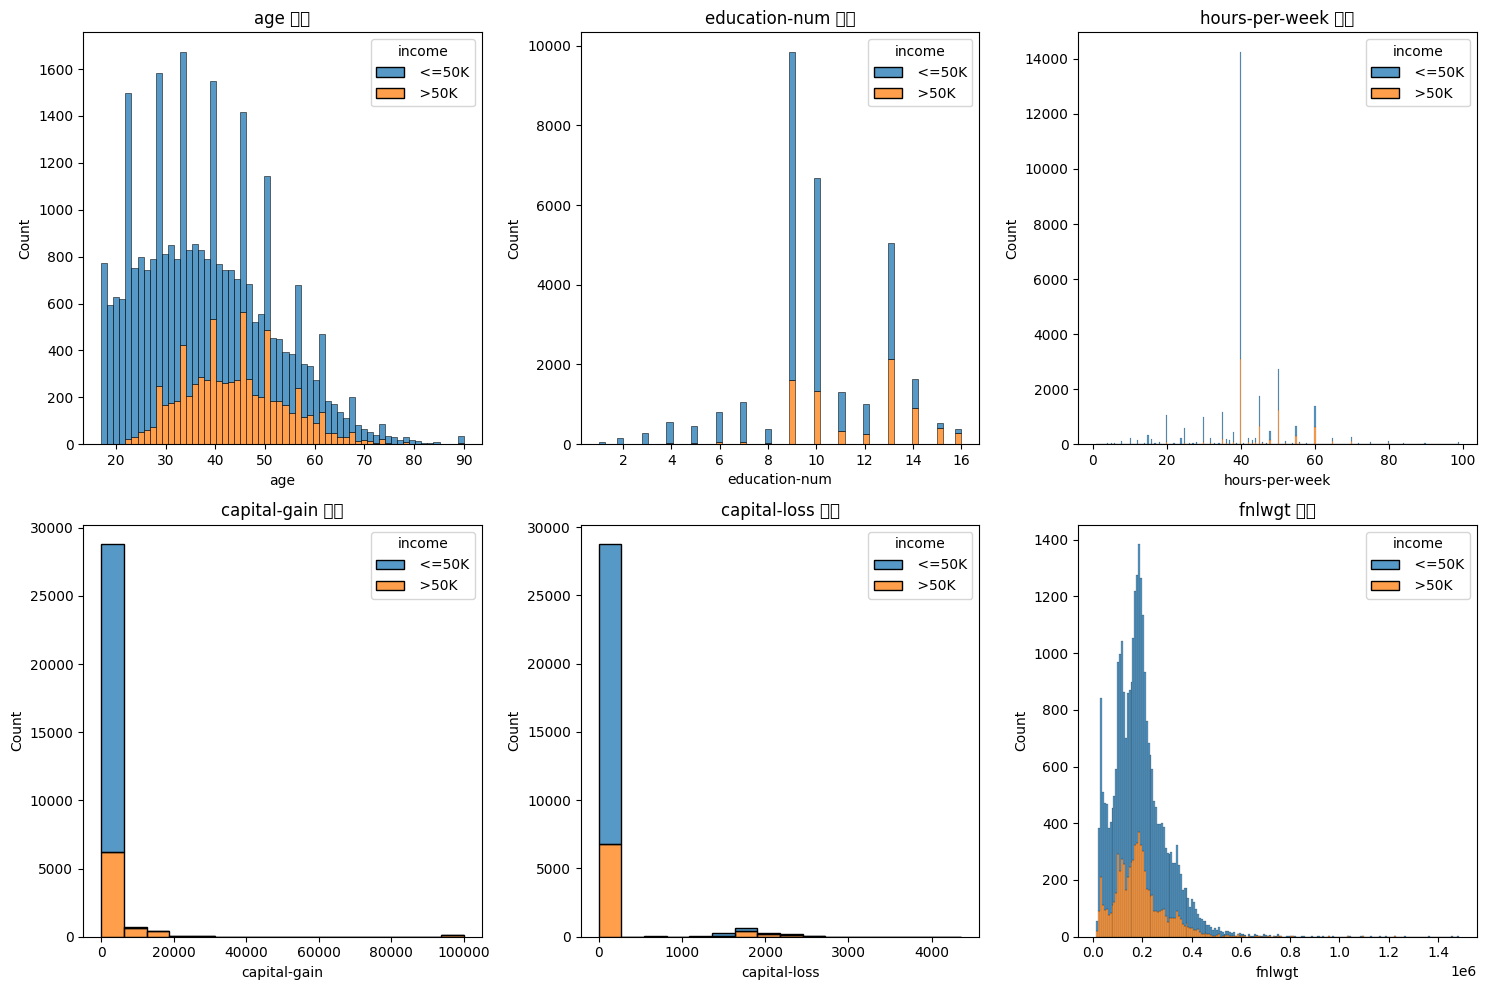


数值特征的基本统计信息：
                age  education-num  hours-per-week  capital-gain  \
count  30162.000000   30162.000000    30162.000000  30162.000000   
mean      38.437902      10.121312       40.931238   1092.007858   
std       13.134665       2.549995       11.979984   7406.346497   
min       17.000000       1.000000        1.000000      0.000000   
25%       28.000000       9.000000       40.000000      0.000000   
50%       37.000000      10.000000       40.000000      0.000000   
75%       47.000000      13.000000       45.000000      0.000000   
max       90.000000      16.000000       99.000000  99999.000000   

       capital-loss        fnlwgt  
count  30162.000000  3.016200e+04  
mean      88.372489  1.897938e+05  
std      404.298370  1.056530e+05  
min        0.000000  1.376900e+04  
25%        0.000000  1.176272e+05  
50%        0.000000  1.784250e+05  
75%        0.000000  2.376285e+05  
max     4356.000000  1.484705e+06  


In [45]:
# 4. 分析数值特征的分布与相关性
numerical_features = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'fnlwgt']

# 创建数值特征的分布图
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(data=df, x=feature, hue='income', multiple="stack")
    plt.title(f'{feature} 分布')
plt.tight_layout()
plt.show()

# 计算数值特征的基本统计量
print("\n数值特征的基本统计信息：")
print(df[numerical_features].describe())

In [46]:
# 计算有收益和损失的记录数
capital_gain_records = (df['capital-gain'] > 0).sum()
capital_loss_records = (df['capital-loss'] > 0).sum()

# 计算占比
total_records = len(df)
print("Capital Gain分析：")
print(f"有收益的记录数: {capital_gain_records}")
print(f"有收益的记录占比: {(capital_gain_records/total_records)*100:.2f}%")
print(f"无收益的记录占比: {((total_records-capital_gain_records)/total_records)*100:.2f}%")

print("\nCapital Loss分析：")
print(f"有损失的记录数: {capital_loss_records}")
print(f"有损失的记录占比: {(capital_loss_records/total_records)*100:.2f}%")
print(f"无损失的记录占比: {((total_records-capital_loss_records)/total_records)*100:.2f}%")

# 删除这两列
df = df.drop(['capital-gain', 'capital-loss'], axis=1)
print(f"数据集维度: {df.shape}")

Capital Gain分析：
有收益的记录数: 2538
有收益的记录占比: 8.41%
无收益的记录占比: 91.59%

Capital Loss分析：
有损失的记录数: 1427
有损失的记录占比: 4.73%
无损失的记录占比: 95.27%
数据集维度: (30162, 13)


In [47]:
# 删除fnlwgt列
df = df.drop(['fnlwgt'], axis=1)
print("删除fnlwgt列后的数据集维度：", df.shape)

删除fnlwgt列后的数据集维度： (30162, 12)


In [48]:
# 区分数值特征和分类特征
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']
numerical_features = ['age', 'education-num', 'hours-per-week']

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# 对分类特征进行编码
encoded_features = encoder.fit_transform(df[categorical_features])

# 获取编码后的特征名称
feature_names = []
for i, feature in enumerate(categorical_features):
    # 获取当前特征的所有类别（跳过第一个类别，因为使用了drop='first'）
    categories = encoder.categories_[i][1:]
    # 生成特征名称
    feature_names.extend([f"{feature}_{cat.strip()}" for cat in categories])

# 创建包含编码特征的DataFrame，使用原始数据的索引
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=feature_names,
    index=df.index
)

# 确保数值特征使用相同的索引
numerical_df = df[numerical_features].copy()

# 合并数值特征和编码后的特征，使用相同的索引进行对齐
final_df = pd.concat([numerical_df, encoded_df], axis=1)

# 处理目标变量（income），保持相同的索引
final_df['income'] = df['income'].map({' >50K': 1, ' <=50K': 0})

C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\289363517.py:14: UserWarni

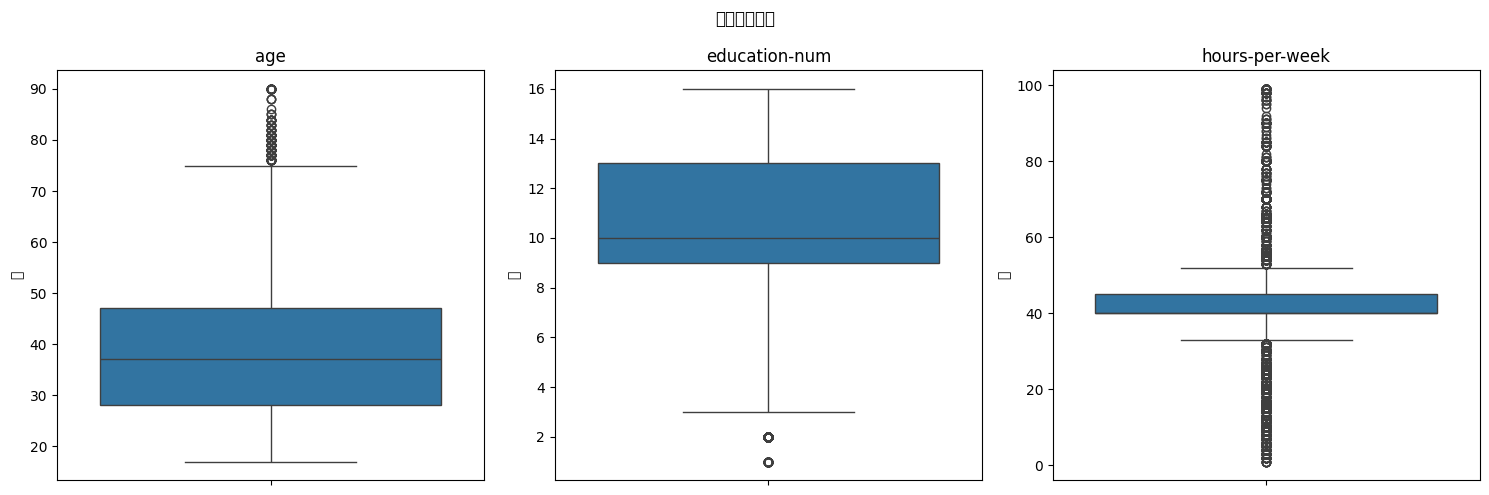

数值特征的基本统计信息：
                age  education-num  hours-per-week
count  30162.000000   30162.000000    30162.000000
mean      38.437902      10.121312       40.931238
std       13.134665       2.549995       11.979984
min       17.000000       1.000000        1.000000
25%       28.000000       9.000000       40.000000
50%       37.000000      10.000000       40.000000
75%       47.000000      13.000000       45.000000
max       90.000000      16.000000       99.000000

异常值统计：

age:
异常值数量: 169
正常值范围: [-0.50, 75.50]
实际范围: [17.00, 90.00]
异常值占比: 0.56%

education-num:
异常值数量: 196
正常值范围: [3.00, 19.00]
实际范围: [1.00, 16.00]
异常值占比: 0.65%

hours-per-week:
异常值数量: 7953
正常值范围: [32.50, 52.50]
实际范围: [1.00, 99.00]
异常值占比: 26.37%


In [49]:
# 1. 分析数值特征的分布
import matplotlib.pyplot as plt
import seaborn as sns

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('数值特征分布')

# 绘制箱线图查看异常值
for i, feature in enumerate(numerical_features):
    sns.boxplot(data=df[feature], ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('值')
plt.tight_layout()
plt.show()

# 显示基本统计信息
print("数值特征的基本统计信息：")
print(df[numerical_features].describe())

# 2. 检查异常值（使用IQR方法）
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

print("\n异常值统计：")
for feature in numerical_features:
    n_outliers, lower, upper = detect_outliers(df, feature)
    print(f"\n{feature}:")
    print(f"异常值数量: {n_outliers}")
    print(f"正常值范围: [{lower:.2f}, {upper:.2f}]")
    print(f"实际范围: [{df[feature].min():.2f}, {df[feature].max():.2f}]")
    print(f"异常值占比: {(n_outliers/len(df))*100:.2f}%")


标准化参数：

age:
均值: 38.44
标准差: 13.13

education-num:
均值: 10.12
标准差: 2.55

hours-per-week:
均值: 40.93
标准差: 11.98

标准化后的统计信息：
                age  education-num  hours-per-week
count  3.016200e+04   3.016200e+04    3.016200e+04
mean   1.535952e-16  -3.053058e-16   -2.833973e-16
std    1.000017e+00   1.000017e+00    1.000017e+00
min   -1.632189e+00  -3.577051e+00   -3.333218e+00
25%   -7.946967e-01  -4.397382e-01   -7.773411e-02
50%   -1.094756e-01  -4.757405e-02   -7.773411e-02
75%    6.518811e-01   1.128918e+00    3.396356e-01
max    3.925715e+00   2.305411e+00    4.847229e+00


C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\weiyu hou\AppData\Local\Temp\ipykernel_29176\1902963171.py:45: Use

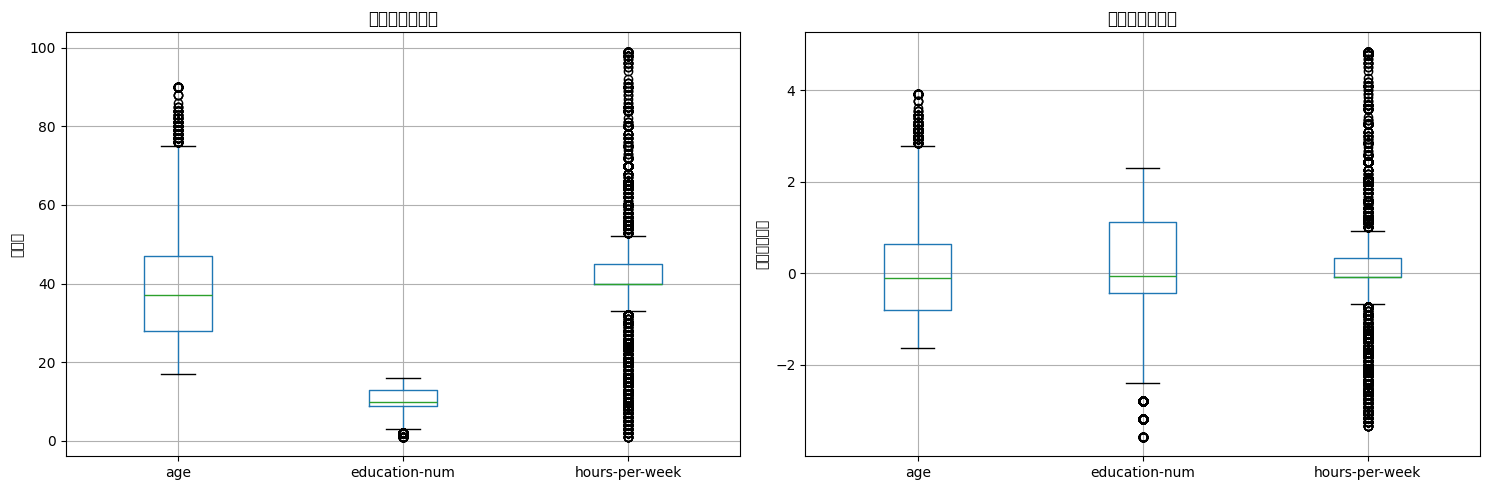


数据已保存到：Census Income Data Set/preprocessed_adult_final.csv
最终数据集维度：(30162, 94)

最终特征列表：
['age', 'education-num', 'hours-per-week', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_Without-pay', 'education_11th', 'education_12th', 'education_1st-4th', 'education_5th-6th', 'education_7th-8th', 'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Preschool', 'education_Prof-school', 'education_Some-college', 'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse', 'marital-status_Married-spouse-absent', 'marital-status_Never-married', 'marital-status_Separated', 'marital-status_Widowed', 'occupation_Armed-Forces', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-

In [50]:
# 3. 对数值特征进行标准化处理
from sklearn.preprocessing import StandardScaler

# 初始化标准化器
scaler = StandardScaler()

# 对数值特征进行标准化
numerical_df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numerical_features]),
    columns=numerical_features,
    index=df.index
)

# 保存标准化器的参数
scaler_params = {
    'mean_': scaler.mean_,
    'scale_': scaler.scale_
}
print("\n标准化参数：")
for feature, mean, scale in zip(numerical_features, scaler.mean_, scaler.scale_):
    print(f"\n{feature}:")
    print(f"均值: {mean:.2f}")
    print(f"标准差: {scale:.2f}")

# 更新final_df中的数值特征
final_df[numerical_features] = numerical_df_scaled

# 检查标准化后的分布
print("\n标准化后的统计信息：")
print(final_df[numerical_features].describe())

# 可视化标准化效果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# 标准化前
df[numerical_features].boxplot(ax=ax1)
ax1.set_title('标准化前的分布')
ax1.set_ylabel('原始值')

# 标准化后
final_df[numerical_features].boxplot(ax=ax2)
ax2.set_title('标准化后的分布')
ax2.set_ylabel('标准化后的值')

plt.tight_layout()
plt.show()

# 保存处理后的数据集
output_path = 'Census Income Data Set/preprocessed_adult_final.csv'
final_df.to_csv(output_path, index=False)

print(f"\n数据已保存到：{output_path}")
print(f"最终数据集维度：{final_df.shape}")
print("\n最终特征列表：")
print(final_df.columns.tolist())

In [51]:
# 导入数据集划分工具
from sklearn.model_selection import train_test_split

# 准备特征(X)和目标变量(y)
X = final_df.drop('income', axis=1)
y = final_df['income']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% 作为测试集
    random_state=42,    # 设置随机种子，确保结果可重复
    stratify=y          # 保持目标变量的分布一致
)

# 显示数据集划分结果
print("数据集划分结果：")
print(f"训练集大小：{X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"测试集大小：{X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")

# 检查目标变量在训练集和测试集中的分布
print("\n目标变量分布：")
print("训练集：")
print(y_train.value_counts(normalize=True).round(3))
print("\n测试集：")
print(y_test.value_counts(normalize=True).round(3))

# 保存划分后的数据集
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_path = 'Census Income Data Set/train_data.csv'
test_path = 'Census Income Data Set/test_data.csv'

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"\n训练集已保存到：{train_path}")
print(f"测试集已保存到：{test_path}")

数据集划分结果：
训练集大小：21113 (70.0%)
测试集大小：9049 (30.0%)

目标变量分布：
训练集：
income
0    0.751
1    0.249
Name: proportion, dtype: float64

测试集：
income
0    0.751
1    0.249
Name: proportion, dtype: float64

训练集已保存到：Census Income Data Set/train_data.csv
测试集已保存到：Census Income Data Set/test_data.csv

训练集已保存到：Census Income Data Set/train_data.csv
测试集已保存到：Census Income Data Set/test_data.csv


In [52]:
# 对adult.test进行相同的处理

# 读取原始测试数据（跳过第一行，因为测试集文件包含列描述）
test_df_original = pd.read_csv('Census Income Data Set/adult.test.csv', skiprows=1, header=None,
                             names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                   'marital-status', 'occupation', 'relationship', 'race',
                                   'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                                   'native-country', 'income'])

# 检查并处理缺失值
print("检查测试集中的特殊值：")
for column in categorical_features:
    unique_values = test_df_original[column].unique()
    print(f"\n{column} 的唯一值：")
    print(unique_values)

# 确保分类特征中没有nan值
for column in categorical_features:
    test_df_original[column] = test_df_original[column].fillna(' ?')

# 删除包含'?'的行
rows_before = len(test_df_original)
for column in ['workclass', 'occupation', 'native-country']:
    test_df_original = test_df_original[test_df_original[column] != ' ?']
rows_after = len(test_df_original)
print(f"\n删除缺失值后的行数变化：{rows_before} -> {rows_after}")

# 删除不必要的特征
test_df_original = test_df_original.drop(['capital-gain', 'capital-loss', 'fnlwgt'], axis=1)

# 确保分类特征的值与训练集一致
print("\n检查每个分类特征的唯一值：")
for feature in categorical_features:
    train_categories = set([cat.strip() for cat in encoder.categories_[categorical_features.index(feature)]])
    test_categories = set([cat.strip() for cat in test_df_original[feature].unique()])
    new_categories = test_categories - train_categories
    if new_categories:
        print(f"\n{feature} 中发现新类别：{new_categories}")

# 使用相同的编码器处理分类特征
test_encoded_features = encoder.transform(test_df_original[categorical_features])
test_encoded_df = pd.DataFrame(
    test_encoded_features,
    columns=feature_names,
    index=test_df_original.index
)

# 准备数值特征
test_numerical_df = test_df_original[numerical_features].copy()

# 使用相同的标准化器处理数值特征
test_numerical_scaled = pd.DataFrame(
    scaler.transform(test_numerical_df),
    columns=numerical_features,
    index=test_df_original.index
)

# 合并所有特征
test_final_df = pd.concat([test_numerical_scaled, test_encoded_df], axis=1)

# 处理目标变量（注意原始测试集中的格式可能略有不同）
test_final_df['income'] = test_df_original['income'].str.strip().map({'>50K.': 1, '<=50K.': 0})

# 保存处理后的测试数据
test_output_path = 'Census Income Data Set/preprocessed_adult_test.csv'
test_final_df.to_csv(test_output_path, index=False)

# 显示处理结果
print("\n原始测试集处理结果：")
print(f"处理前数据集大小：{rows_before}")
print(f"处理后数据集大小：{len(test_final_df)}")
print(f"\n特征数量：{test_final_df.shape[1]-1}")  # 减去目标变量
print("\n目标变量分布：")
print(test_final_df['income'].value_counts(normalize=True).round(3))

# 验证特征名称一致性
train_features = set(final_df.columns)
test_features = set(test_final_df.columns)
if train_features == test_features:
    print("\n✓ 训练集和测试集的特征完全一致")
else:
    print("\n⚠ 警告：特征不一致！")
    print("只在训练集中出现的特征:", train_features - test_features)
    print("只在测试集中出现的特征:", test_features - train_features)

print(f"\n处理后的测试数据已保存到：{test_output_path}")

检查测试集中的特殊值：

workclass 的唯一值：
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']

education 的唯一值：
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']

marital-status 的唯一值：
[' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']

occupation 的唯一值：
[' Machine-op-inspct' ' Farming-fishing' ' Protective-serv' ' ?'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']

relationship 的唯一值：
[' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']

race 的唯一值：
[' Black' ' White' ' Asian-Pac-Islander' ' Other' ' Amer-Indian-Eskimo']

sex 的唯一值：
[' Male' ' Female']

